In [1]:
import sys
sys.path.append("../sketchformer")

from basic_usage.sketchformer import continuous_embeddings
sketchformer = continuous_embeddings.get_pretrained_model()

[INFO] Loaded megabatch from /home/george/tanigaki/i-sketcher/interactive-sketcher/sketchformer/basic_usage/tmp_data/test.npz
[run-experiment] resorting checkpoint if exists
[Checkpoint] Restored, step #207536


In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

def visualize(sketch):
    X = []
    Y = []

    tmp_x, tmp_y = [], []
    sx = sy = 0
    for p in sketch:
        sx += p[0]
        sy += p[1]
        tmp_x.append(sx)
        tmp_y.append(-sy)
        if p[2] == 1:
            X.append(tmp_x)
            Y.append(tmp_y)
            tmp_x, tmp_y = [], []

    X.append(tmp_x)
    Y.append(tmp_y)

    for x, y in zip(X, Y):
        plt.plot(x, y)

    # save the image.
    # plt.savefig("sample.png")

    # show the plot
    plt.axes().set_aspect('equal')
    plt.show()

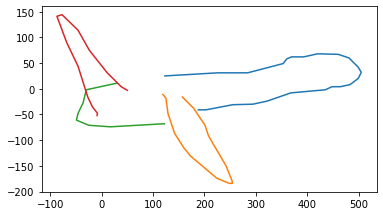

[INFO] Loaded megabatch from /home/george/tanigaki/i-sketcher/interactive-sketcher/sketchformer/basic_usage/tmp_data/test.npz


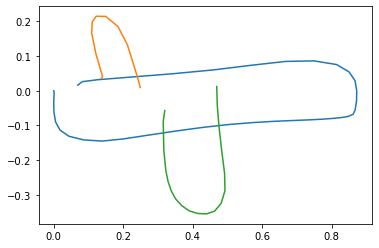

In [12]:
import numpy as np
import random

# load npz
filename = "../data/sketch_rnn/airplane.npz"
airplanes = np.load(filename, encoding='latin1', allow_pickle=True)

# pick sample
N = 1
sketch = []
for _ in range(N):
    ind = random.randint(0, len(airplanes['train']) - 1)
    sketch.append(airplanes['train'][ind])

# visualize
visualize(sketch[0])

recon = sketchformer.get_re_construction(sketch)
visualize(recon[0])